# Effect of symmetry and calculation method on the DOS of rocksalt CoO

In the cells below indexed 1 through 3 (please scroll and see titles below) I shot the total DOS of CoO calculated in the rocksalt structure keeping fixed cell internal and cell external. I imposed the AFM-II magnetic order and set the lattice parameter equal to the value corresponding to the minimum of the Etot vs alat curve calculated turning off the symmetrization. There are three cases shown below :

- Case 1 : Total Dos with symmetry on and SCF performed with the tetrahedron method for k-space integration
- Case 2 : Total Dos with symmetry on and SCF performed with gaussian smearing in the k-space integration
- Case 3 : Total Dos without symmetrization

All are PBE+U calculations (U=4 eV). Note that in case 1 and 2 (symmetry on) the solution found is metallic. Moreover, the DOS looks different depending on whether the SCF is run with the k-space integration perfprmed with the tetrahedron method (case 1) or with gaussian smearing (case 2). In fact case 1 looks to me like a semi-metallic solution which is curious, and I also observed that the up-spin and down-spin sites differ slightly in the module of the magnetic moment (a difference of 0.02 Bohr magnetons). Case 3 is the solution found with the symmetrization off and it is insulating and the spin-up and spin-down moments have the same amplitude. 

The conclusion so far is that the way the SCF calculation is performed does influence the solution that is found. The insulating solution (at least in principle) is compatible with the space group symmetry of the AFM-II rocksalt phase and should come out also with the symmtrization option on. A possibility to explain these results is that VASP the density sinthesized at the beginning of the SCF cycles as a combination of atomic orbitals is not realistic and if the symmetrization is on the SCF loop cannot move towars a solution with a more realistic and optimal charge distribution in space. 


In [1]:
%matplotlib inline
import pylab
import numpy as np
import os

from ase import Atoms
from ase.io import read
from ase.calculators.vasp import Vasp
from ase.calculators.vasp import VaspDos


In [5]:
def process_dos(working_folder):

    os.chdir(working_folder)

    outcar_file = 'OUTCAR'
    doscar_file = 'DOSCAR'

    # Read the Fermi level from the OUTCAR file of the current calculation
    E_f=None
    for line in open(outcar_file, 'r'):
        if line.rfind('E-fermi') > -1:
            E_f=float(line.split()[2])

    print "Fermi level : ",E_f

    dos = VaspDos(doscar='DOSCAR',efermi=E_f)
    energies = dos.energy

    return energies, dos
    #nedos = np.size(energies)
    #cont = np.zeros(nedos)

## 1. Total Dos with symmetry on and SCF performed with the tetrahedron method for k-space integration

Fermi level :  4.6846


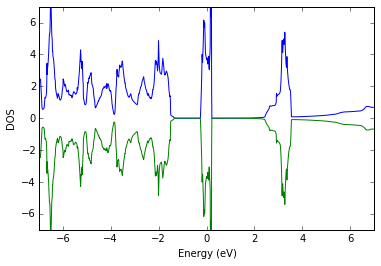

In [6]:
working_folder = '/home/gtrimarc/Dropbox/Current_Projects/Mott_project/Monoxides_sqs.dir/Results.dir/CoO.dir/RS_equ_sym2.dir'

energies, dos = process_dos(working_folder)


pylab.plot(energies, dos.dos[0,:])
pylab.plot(energies, -dos.dos[1,:])
#pylab.xlabel('Energy - $E_f$ (eV)')
pylab.xlim((-7,7))
pylab.ylim((-7,7))
pylab.xlabel('Energy (eV)')
pylab.ylabel('DOS')

## 2. Total Dos with symmetry on and SCF performed with gaussian smearing in the k-space integration

Fermi level :  4.7102


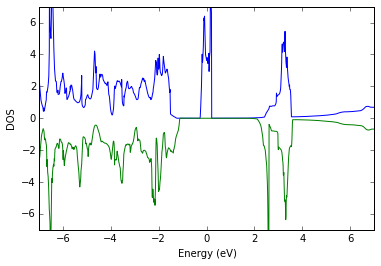

In [9]:
working_folder = '/home/gtrimarc/Dropbox/Current_Projects/Mott_project/Monoxides_sqs.dir/Results.dir/CoO.dir/RS_equ_sym.dir'

energies, dos = process_dos(working_folder)

pylab.plot(energies, dos.dos[0,:])
pylab.plot(energies, -dos.dos[1,:])
#pylab.xlabel('Energy - $E_f$ (eV)')
pylab.xlim((-7,7))
pylab.ylim((-7,7))
pylab.xlabel('Energy (eV)')
pylab.ylabel('DOS')

## 3. Total Dos without symmetrization

Fermi level :  3.5552


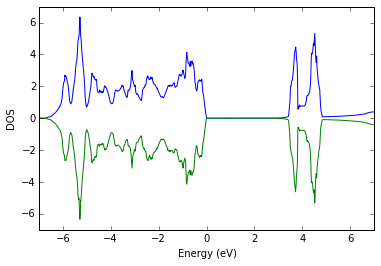

In [10]:
working_folder = '/home/gtrimarc/Dropbox/Current_Projects/Mott_project/Monoxides_sqs.dir/Results.dir/CoO.dir/RS_equ_nosym.dir'

energies, dos = process_dos(working_folder)

pylab.plot(energies, dos.dos[0,:])
pylab.plot(energies, -dos.dos[1,:])
#pylab.xlabel('Energy - $E_f$ (eV)')
pylab.xlim((-7,7))
pylab.ylim((-7,7))
pylab.xlabel('Energy (eV)')
pylab.ylabel('DOS')